In [1]:
import os
import folium

In [2]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
%matplotlib inline

In [3]:
df_train_full = pd.read_csv('../data/train.csv',index_col=0)

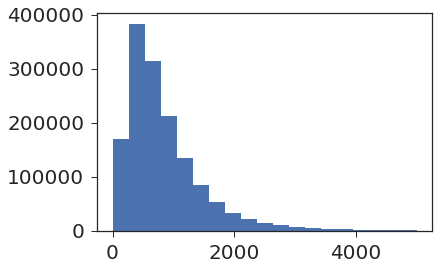

In [4]:
df_train_full.head()
plt.hist(df_train_full.trip_duration,bins=np.linspace(0,5000,20));

In [5]:
df_train=df_train_full.sample(n=10000)
df_train.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
id,,,,,,,,,,
id3472312,2,2016-04-07 08:13:40,2016-04-07 08:33:03,5,-73.961349,40.768318,-73.961678,40.759521,N,1163
id3834246,2,2016-06-09 07:50:31,2016-06-09 08:13:04,1,-74.007652,40.732441,-73.973061,40.758099,N,1353
id3610554,2,2016-04-12 19:24:20,2016-04-12 19:30:23,1,-73.969597,40.748989,-73.957939,40.767818,N,363
id0639104,2,2016-01-07 00:02:01,2016-01-07 00:20:18,1,-73.991570,40.750198,-73.941208,40.762348,N,1097
id1359841,1,2016-01-08 19:14:52,2016-01-08 19:21:34,1,-73.972610,40.764187,-73.963165,40.762238,N,402


In [9]:
from datetime import datetime
tmp=df_train.pickup_datetime.apply(lambda x: \
    datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))

df_train=df_train.assign(pickup_date=tmp.apply(lambda x: x.date()))
df_train=df_train.assign(pickup_time=tmp.apply(lambda x: x.time()))
df_train=df_train.assign(pickup_hour=tmp.map(lambda x: x.hour))
df_train=df_train.assign(dropoff_date=tmp.apply(lambda x: x.date()))
df_train=df_train.assign(dropoff_time=tmp.apply(lambda x: x.time()))
df_train=df_train.assign(dropoff_hour=tmp.map(lambda x: x.hour))



# df_train.assign(pickup_time=tmp.apply(lambda x: x.time()))
# df_train.assign(pickup_hour=tmp.map(lambda x: x.hour))
df_train.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_time,pickup_hour,dropoff_date,dropoff_time,dropoff_hour
id,,,,,,,,,,,,,,,,
id3472312,2,2016-04-07 08:13:40,2016-04-07 08:33:03,5,-73.961349,40.768318,-73.961678,40.759521,N,1163,2016-04-07,08:13:40,8,2016-04-07,08:13:40,8
id3834246,2,2016-06-09 07:50:31,2016-06-09 08:13:04,1,-74.007652,40.732441,-73.973061,40.758099,N,1353,2016-06-09,07:50:31,7,2016-06-09,07:50:31,7
id3610554,2,2016-04-12 19:24:20,2016-04-12 19:30:23,1,-73.969597,40.748989,-73.957939,40.767818,N,363,2016-04-12,19:24:20,19,2016-04-12,19:24:20,19
id0639104,2,2016-01-07 00:02:01,2016-01-07 00:20:18,1,-73.991570,40.750198,-73.941208,40.762348,N,1097,2016-01-07,00:02:01,0,2016-01-07,00:02:01,0
id1359841,1,2016-01-08 19:14:52,2016-01-08 19:21:34,1,-73.972610,40.764187,-73.963165,40.762238,N,402,2016-01-08,19:14:52,19,2016-01-08,19:14:52,19


# Average the data based on date/time

In [11]:
df_train.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_time,pickup_hour,dropoff_date,dropoff_time,dropoff_hour
id,,,,,,,,,,,,,,,,
id3472312,2,2016-04-07 08:13:40,2016-04-07 08:33:03,5,-73.961349,40.768318,-73.961678,40.759521,N,1163,2016-04-07,08:13:40,8,2016-04-07,08:13:40,8
id3834246,2,2016-06-09 07:50:31,2016-06-09 08:13:04,1,-74.007652,40.732441,-73.973061,40.758099,N,1353,2016-06-09,07:50:31,7,2016-06-09,07:50:31,7
id3610554,2,2016-04-12 19:24:20,2016-04-12 19:30:23,1,-73.969597,40.748989,-73.957939,40.767818,N,363,2016-04-12,19:24:20,19,2016-04-12,19:24:20,19
id0639104,2,2016-01-07 00:02:01,2016-01-07 00:20:18,1,-73.991570,40.750198,-73.941208,40.762348,N,1097,2016-01-07,00:02:01,0,2016-01-07,00:02:01,0
id1359841,1,2016-01-08 19:14:52,2016-01-08 19:21:34,1,-73.972610,40.764187,-73.963165,40.762238,N,402,2016-01-08,19:14:52,19,2016-01-08,19:14:52,19


In [10]:
df_date=df_train.groupby('pickup_date').mean().reset_index()
df_date.head()

,pickup_date,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_hour,dropoff_hour
0,2016-01-01,1.618182,1.745455,-73.970284,40.748505,-73.972640,40.751621,2174.109091,10.218182,10.218182
1,2016-01-02,1.489362,1.382979,-73.975602,40.753503,-73.977094,40.760725,647.276596,13.829787,13.829787
2,2016-01-03,1.653846,1.865385,-73.971864,40.751950,-73.973573,40.751809,689.019231,11.923077,11.923077
3,2016-01-04,1.510638,1.553191,-73.974073,40.748004,-73.972019,40.747057,703.914894,15.808511,15.808511
4,2016-01-05,1.571429,1.551020,-73.970007,40.756139,-73.962900,40.760187,758.857143,13.122449,13.122449


# Get the position of the subway stations

In [13]:
import shapefile
sub_shp=open('../data/Subway_Stations/geo_export_5d2a41e3-2a81-42a2-98d5-b317da5c00c2.shp','rb')
sub_dbf=open('../data/Subway_Stations/geo_export_5d2a41e3-2a81-42a2-98d5-b317da5c00c2.dbf','rb')
sf=shapefile.Reader(shp=sub_shp,dbf=sub_dbf)
records = sf.shapeRecords()

In [14]:
# is it xy data (1)??
sf.shapes()[0].shapeType

1

In [15]:
# fields
sf.fields

[('DeletionFlag', 'C', 1, 0),
 ['notes', 'C', 254, 0],
 ['url', 'C', 254, 0],
 ['name', 'C', 254, 0],
 ['objectid', 'N', 33, 31],
 ['line', 'C', 254, 0]]

In [16]:
# print the station names
for itr in records[:3]:
    print(itr.record[2], itr.shape.points[0])

Astor Pl [-73.99106999861966, 40.73005400028978]
Canal St [-74.00019299927328, 40.71880300107709]
50th St [-73.98384899986625, 40.76172799961419]


In [22]:
import folium
ny_map=folium.Map(location=[40.76172799961419,-73.98384899986625],zoom_start=13)
for itr in records[:]:
    lng,lat = itr.shape.points[0]
    folium.RegularPolygonMarker(
        [lat,lng],
        popup=itr.record[2],fill_color='black',number_of_sides=10,radius=7).add_to(ny_map)
# save the map so we can see on git hub
ny_map.save('sub_map.html')
ny_map

# Get the distance to the subway stations

In [21]:
#check the decoration
df_train.columns

Index(['vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration',
       'pickup_date', 'pickup_time', 'pickup_hour', 'dropoff_date',
       'dropoff_time', 'dropoff_hour'],
      dtype='object')

In [19]:
df_pos=

In [ ]:
folium.RegularPolygonMarker?

In [ ]:
df_train.head()

Define a function that finds the nearest subway station

In [ ]:
from geopy.distance import great_circle
newport_ri = (41.49008, -71.312796)
cleveland_oh = (41.499498, -81.695391)
print(great_circle(newport_ri, cleveland_oh).miles)

In [ ]:
def dist_to_nearest(df_train):
    records

In [ ]:
from folium import plugins
df=df_train.head(3)
for itr in df: 
    folium.RegularPolygonMarker(
        [lat,lng],
        popup=itr.record[2],fill_color='red',number_of_sides=10,radius=3).add_to(ny_map)
ny_map

In [ ]:
[df['pickup_latitude'].values,df['pickup_longitude'].values,df['trip_duration'].values]

In [ ]:
df_train.head()

In [ ]:
from shapely.geometry import Point, Polygon

# Create Point objects
p1 = Point(24.952242, 60.1696017)
p2 = Point(24.976567, 60.1612500)

# Create a Polygon
coords = [(24.950899, 60.169158), (24.953492, 60.169158), (24.953510, 60.170104), (24.950958, 60.169990)]
poly = Polygon(coords)
poly

In [ ]:
import shapefile
nb_shp=open('./data/nycmih_20170815/nycmih_20170815.shp','rb')
nb_dbf=open('./data/nycmih_20170815/nycmih_20170815.dbf','rb')
sf_nb=shapefile.Reader(shp=nb_shp,dbf=nb_dbf)
nb_rec = sf_nb.shapeRecords()

In [ ]:
sf_nb.shapes()[0].shapeType

In [ ]:
sf_nb.fields

In [ ]:
filtered = filter(lambda f: f['properties']['COUNTYFP']=='061', nb_rec)


In [ ]:
for itr,irec in enumerate(filtered):
    print(irec.record[:], irec.shape.points[0])

In [ ]:
nb_rec.record

In [ ]:
import geopandas as gpd
data = gpd.read_file('./data/nynta_17c/nynta.shp')
data